In [468]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt

data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

In [469]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

It took 3 cycles!
It took 3 cycles!


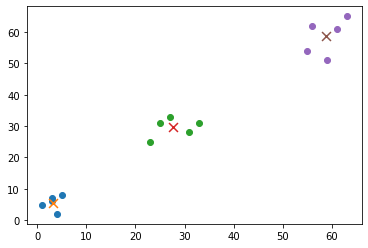

In [472]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        return [i[0] for i in lst]
    def array_remove(self, base_array, test_array):
        for index in range(len(base_array)):
            if np.array_equal(base_array[index], test_array):
                base_array.pop(index)
            else:
                break
        return base_array
    
    def clusters(self,centroids):
        cluster_vals = []
        #print(cluster_vals)
        for i in range(len(centroids)):
            cluster_vals.append([centroids[i]])
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for i in range(len(cluster_vals)):
                distances.append(np.linalg.norm(y - cluster_vals[i][0]))
            #print(distances)
            idx = distances.index(min(distances))
            cluster_vals[idx].append(y)
        for y in centroids:
            cluster_vals = self.array_remove(cluster_vals, y)
                        
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))

        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        print('It took ' + str(count) + ' cycles!')
        return updates
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        for i in range(self.k):
            plt.scatter(test_array[i][1:,0], test_array[i][1:,1])
            plt.scatter(test_array[i][0][0], test_array[i][0][1], marker='x', s=80)
        return plt.show()
        
test = k_means(data, 3)    
test.k_means_func()

test.plot()